In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
len(df.columns)

135

In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
len(set(df['weaptype1_txt']))

12

In [6]:
new_df = df[['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'latitude', 'longitude',
             'success', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'gname', 'claimmode_txt', 'weaptype1_txt', 'nkill',
             'nwound']]
new_df.head(10)

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,natlty1_txt,gname,claimmode_txt,weaptype1_txt,nkill,nwound
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,NaN,Unknown,1.0,0.0
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,NaN,Unknown,0.0,0.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,United States,Unknown,NaN,Unknown,1.0,0.0
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,NaN,Explosives,NaN,NaN
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,NaN,Incendiary,NaN,NaN
5,197001010002,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,1,Armed Assault,Police,United States,Black Nationalists,NaN,Firearms,0.0,0.0
6,197001020001,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,0,Assassination,Police,Uruguay,Tupamaros (Uruguay),NaN,Firearms,0.0,0.0
7,197001020002,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,1,Bombing/Explosion,Utilities,United States,Unknown,NaN,Explosives,0.0,0.0
8,197001020003,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,-89.412488,1,Facility/Infrastructure Attack,Military,United States,New Year's Gang,Letter,Incendiary,0.0,0.0
9,197001030001,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,-89.386694,1,Facility/Infrastructure Attack,Government (General),United States,New Year's Gang,NaN,Incendiary,0.0,0.0


In [7]:
len(new_df.columns)

19

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   imonth           181691 non-null  int64  
 3   iday             181691 non-null  int64  
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   provstate        181270 non-null  object 
 7   city             181257 non-null  object 
 8   latitude         177135 non-null  float64
 9   longitude        177134 non-null  float64
 10  success          181691 non-null  int64  
 11  attacktype1_txt  181691 non-null  object 
 12  targtype1_txt    181691 non-null  object 
 13  natlty1_txt      180132 non-null  object 
 14  gname            181691 non-null  object 
 15  claimmode_txt    19083 non-null   object 
 16  weaptype1_txt    181691 non-null  obje

In [9]:
new_df.describe()

,eventid,iyear,imonth,iday,latitude,longitude,success,nkill,nwound
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,171378.000000,165380.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,2.403272,3.167668
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,11.545741,35.949392
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1570.000000,8191.000000


### Data Cleaning
- replace zero values in the month column with 1
- replace zero values in the day column with 1 to represent the first day 

In [10]:
df_clean = new_df.copy()
df_clean['imonth'] = new_df['imonth'].replace({0 : 1})
df_clean['imonth'].unique()

array([ 7,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12], dtype=int64)

In [11]:
df_clean['iday'] = df_clean['iday'].replace({0:1})
df_clean['iday'].unique()

array([ 2,  1,  3,  6,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 25,
       26, 27, 28, 30, 31,  4,  7, 16, 17, 18, 23, 24,  5, 29],
      dtype=int64)

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   imonth           181691 non-null  int64  
 3   iday             181691 non-null  int64  
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   provstate        181270 non-null  object 
 7   city             181257 non-null  object 
 8   latitude         177135 non-null  float64
 9   longitude        177134 non-null  float64
 10  success          181691 non-null  int64  
 11  attacktype1_txt  181691 non-null  object 
 12  targtype1_txt    181691 non-null  object 
 13  natlty1_txt      180132 non-null  object 
 14  gname            181691 non-null  object 
 15  claimmode_txt    19083 non-null   object 
 16  weaptype1_txt    181691 non-null  obje

In [13]:
df_clean.head(10)

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,natlty1_txt,gname,claimmode_txt,weaptype1_txt,nkill,nwound
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,NaN,Unknown,1.0,0.0
1,197000000002,1970,1,1,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,NaN,Unknown,0.0,0.0
2,197001000001,1970,1,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,United States,Unknown,NaN,Unknown,1.0,0.0
3,197001000002,1970,1,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,NaN,Explosives,NaN,NaN
4,197001000003,1970,1,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,NaN,Incendiary,NaN,NaN
5,197001010002,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,1,Armed Assault,Police,United States,Black Nationalists,NaN,Firearms,0.0,0.0
6,197001020001,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,0,Assassination,Police,Uruguay,Tupamaros (Uruguay),NaN,Firearms,0.0,0.0
7,197001020002,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,1,Bombing/Explosion,Utilities,United States,Unknown,NaN,Explosives,0.0,0.0
8,197001020003,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,-89.412488,1,Facility/Infrastructure Attack,Military,United States,New Year's Gang,Letter,Incendiary,0.0,0.0
9,197001030001,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,-89.386694,1,Facility/Infrastructure Attack,Government (General),United States,New Year's Gang,NaN,Incendiary,0.0,0.0


In [14]:
#create a datetime column
from datetime import datetime
df_clean['Date'] = df_clean.apply(lambda row: datetime.strptime(f"{int(row.iyear)}-{int(row.imonth)}-{int(row.iday)}", '%Y-%m-%d'), axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   eventid          181691 non-null  int64         
 1   iyear            181691 non-null  int64         
 2   imonth           181691 non-null  int64         
 3   iday             181691 non-null  int64         
 4   country_txt      181691 non-null  object        
 5   region_txt       181691 non-null  object        
 6   provstate        181270 non-null  object        
 7   city             181257 non-null  object        
 8   latitude         177135 non-null  float64       
 9   longitude        177134 non-null  float64       
 10  success          181691 non-null  int64         
 11  attacktype1_txt  181691 non-null  object        
 12  targtype1_txt    181691 non-null  object        
 13  natlty1_txt      180132 non-null  object        
 14  gname            181

In [15]:
df_clean = df_clean[['eventid', 'Date','iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'latitude', 'longitude',
             'success', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'gname', 'claimmode_txt', 'weaptype1_txt', 'nkill',
             'nwound']]
df_clean.head(10)

,eventid,Date,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,natlty1_txt,gname,claimmode_txt,weaptype1_txt,nkill,nwound
0,197000000001,1970-07-02,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,NaN,Unknown,1.0,0.0
1,197000000002,1970-01-01,1970,1,1,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,NaN,Unknown,0.0,0.0
2,197001000001,1970-01-01,1970,1,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,United States,Unknown,NaN,Unknown,1.0,0.0
3,197001000002,1970-01-01,1970,1,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,NaN,Explosives,NaN,NaN
4,197001000003,1970-01-01,1970,1,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,NaN,Incendiary,NaN,NaN
5,197001010002,1970-01-01,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,1,Armed Assault,Police,United States,Black Nationalists,NaN,Firearms,0.0,0.0
6,197001020001,1970-01-02,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,0,Assassination,Police,Uruguay,Tupamaros (Uruguay),NaN,Firearms,0.0,0.0
7,197001020002,1970-01-02,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,1,Bombing/Explosion,Utilities,United States,Unknown,NaN,Explosives,0.0,0.0
8,197001020003,1970-01-02,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,-89.412488,1,Facility/Infrastructure Attack,Military,United States,New Year's Gang,Letter,Incendiary,0.0,0.0
9,197001030001,1970-01-03,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,-89.386694,1,Facility/Infrastructure Attack,Government (General),United States,New Year's Gang,NaN,Incendiary,0.0,0.0


In [16]:
#create a casualties colum as a total of killed and wounded
df_clean['Casualties'] = df_clean['nkill'] + df_clean['nwound']
df_clean.head(10)

,eventid,Date,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,...,success,attacktype1_txt,targtype1_txt,natlty1_txt,gname,claimmode_txt,weaptype1_txt,nkill,nwound,Casualties
0,197000000001,1970-07-02,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,...,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,NaN,Unknown,1.0,0.0,1.0
1,197000000002,1970-01-01,1970,1,1,Mexico,North America,Federal,Mexico city,19.371887,...,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,NaN,Unknown,0.0,0.0,0.0
2,197001000001,1970-01-01,1970,1,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,...,1,Assassination,Journalists & Media,United States,Unknown,NaN,Unknown,1.0,0.0,1.0
3,197001000002,1970-01-01,1970,1,1,Greece,Western Europe,Attica,Athens,37.997490,...,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,NaN,Explosives,NaN,NaN,NaN
4,197001000003,1970-01-01,1970,1,1,Japan,East Asia,Fukouka,Fukouka,33.580412,...,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,NaN,Incendiary,NaN,NaN,NaN
5,197001010002,1970-01-01,1970,1,1,United States,North America,Illinois,Cairo,37.005105,...,1,Armed Assault,Police,United States,Black Nationalists,NaN,Firearms,0.0,0.0,0.0
6,197001020001,1970-01-02,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,...,0,Assassination,Police,Uruguay,Tupamaros (Uruguay),NaN,Firearms,0.0,0.0,0.0
7,197001020002,1970-01-02,1970,1,2,United States,North America,California,Oakland,37.791927,...,1,Bombing/Explosion,Utilities,United States,Unknown,NaN,Explosives,0.0,0.0,0.0
8,197001020003,1970-01-02,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,...,1,Facility/Infrastructure Attack,Military,United States,New Year's Gang,Letter,Incendiary,0.0,0.0,0.0
9,197001030001,1970-01-03,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,...,1,Facility/Infrastructure Attack,Government (General),United States,New Year's Gang,NaN,Incendiary,0.0,0.0,0.0


In [17]:
#getting the number of null values in the cleaned dataset
killpercent_null = df_clean['nkill'].isna().sum() / len(df_clean['nkill']) * 100 
woundpercent_null = df_clean['nwound'].isna().sum() / len(df_clean['nwound']) * 100
casualtypercent_null = df_clean['Casualties'].isna().sum() / len(df_clean['Casualties']) * 100
city_null = df_clean['city'].isna().sum() / len(df_clean['city']) * 100
claim_null = df_clean['claimmode_txt'].isna().sum() / len(df_clean['claimmode_txt']) *100

print('there are ' + str(len(df_clean['nkill'])) + ' entries in the killed column \n')
print(f'the percentage of null values in the kill column is {killpercent_null}%')
print(f'the percentage of null values in the wounded column is {woundpercent_null}%')
print(f'the percentage of null values in the casualty column is {casualtypercent_null}%')
print(f'the percentage of null values in the city column is {city_null}%')
print(f'the percentage of null values in the claimmode column is {claim_null}%')



there are 181691 entries in the killed column 

the percentage of null values in the kill column is 5.676120446252153%
the percentage of null values in the wounded column is 8.977329642084639%
the percentage of null values in the casualty column is 9.287196393877517%
the percentage of null values in the city column is 0.23886708752772565%
the percentage of null values in the claimmode column is 89.49700315370602%


In [18]:
print('\n\n A table to show null values')
df_clean.isna().sum()




 A table to show null values


eventid                 0
Date                    0
iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
success                 0
attacktype1_txt         0
targtype1_txt           0
natlty1_txt          1559
gname                   0
claimmode_txt      162608
weaptype1_txt           0
nkill               10313
nwound              16311
Casualties          16874
dtype: int64

In [19]:
#we opt to drop the claim mode column as it has 89.5% of the data missing
#filling null values will lead to a lot of false data which leads to misleading analysis.
df_cleanmode = df_clean.drop(columns = 'claimmode_txt', axis = 0)
df_cleanmode

,eventid,Date,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,natlty1_txt,gname,weaptype1_txt,nkill,nwound,Casualties
0,197000000001,1970-07-02,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0,1.0
1,197000000002,1970-01-01,1970,1,1,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,0.0,0.0,0.0
2,197001000001,1970-01-01,1970,1,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0,1.0
3,197001000002,1970-01-01,1970,1,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,NaN,NaN,NaN
4,197001000003,1970-01-01,1970,1,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017-12-31,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,1,Armed Assault,Military,Somalia,Al-Shabaab,Firearms,1.0,2.0,3.0
181687,201712310029,2017-12-31,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1,Bombing/Explosion,Military,Russia,Muslim extremists,Explosives,2.0,7.0,9.0
181688,201712310030,2017-12-31,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,1,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0,0.0,0.0
181689,201712310031,2017-12-31,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,0,Bombing/Explosion,Government (General),India,Unknown,Explosives,0.0,0.0,0.0


In [20]:
#fill null values in the kill and wounded column
#fill the null values in the kill colum with zero, in the assumption that if there is nobody known to have died the number was zero.
df_cleanmode['nkill'] = df_clean['nkill'].fillna(0)

#fill null values in the wound column with zero
df_cleanmode['nwound'] = df_clean['nwound'].fillna(0)

#update the casualties column
df_cleanmode['Casualties'] = df_cleanmode['nwound'] + df_cleanmode['nkill']

df_cleanmode.head(10)

,eventid,Date,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,natlty1_txt,gname,weaptype1_txt,nkill,nwound,Casualties
0,197000000001,1970-07-02,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0,1.0
1,197000000002,1970-01-01,1970,1,1,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,0.0,0.0,0.0
2,197001000001,1970-01-01,1970,1,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0,1.0
3,197001000002,1970-01-01,1970,1,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,0.0,0.0,0.0
4,197001000003,1970-01-01,1970,1,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,0.0,0.0,0.0
5,197001010002,1970-01-01,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,1,Armed Assault,Police,United States,Black Nationalists,Firearms,0.0,0.0,0.0
6,197001020001,1970-01-02,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,0,Assassination,Police,Uruguay,Tupamaros (Uruguay),Firearms,0.0,0.0,0.0
7,197001020002,1970-01-02,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,1,Bombing/Explosion,Utilities,United States,Unknown,Explosives,0.0,0.0,0.0
8,197001020003,1970-01-02,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,-89.412488,1,Facility/Infrastructure Attack,Military,United States,New Year's Gang,Incendiary,0.0,0.0,0.0
9,197001030001,1970-01-03,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,-89.386694,1,Facility/Infrastructure Attack,Government (General),United States,New Year's Gang,Incendiary,0.0,0.0,0.0


In [21]:
#check the info of the cleaned data
df_cleanmode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   eventid          181691 non-null  int64         
 1   Date             181691 non-null  datetime64[ns]
 2   iyear            181691 non-null  int64         
 3   imonth           181691 non-null  int64         
 4   iday             181691 non-null  int64         
 5   country_txt      181691 non-null  object        
 6   region_txt       181691 non-null  object        
 7   provstate        181270 non-null  object        
 8   city             181257 non-null  object        
 9   latitude         177135 non-null  float64       
 10  longitude        177134 non-null  float64       
 11  success          181691 non-null  int64         
 12  attacktype1_txt  181691 non-null  object        
 13  targtype1_txt    181691 non-null  object        
 14  natlty1_txt      180

In [22]:
#check the total null alues in each column
df_cleanmode.isna().sum()

eventid               0
Date                  0
iyear                 0
imonth                0
iday                  0
country_txt           0
region_txt            0
provstate           421
city                434
latitude           4556
longitude          4557
success               0
attacktype1_txt       0
targtype1_txt         0
natlty1_txt        1559
gname                 0
weaptype1_txt         0
nkill                 0
nwound                0
Casualties            0
dtype: int64

### summary of data cleaning
- the data in the provstate cannot be replaced by the mode as it is geographical data
- the other column city cannot be filled as it is also geographical data
- same case applies to the lattitude and longitude columns, the null values cannot be filled.

In [23]:
df_cleanmode.head()

,eventid,Date,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,natlty1_txt,gname,weaptype1_txt,nkill,nwound,Casualties
0,197000000001,1970-07-02,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0,1.0
1,197000000002,1970-01-01,1970,1,1,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,0.0,0.0,0.0
2,197001000001,1970-01-01,1970,1,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0,1.0
3,197001000002,1970-01-01,1970,1,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,0.0,0.0,0.0
4,197001000003,1970-01-01,1970,1,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,0.0,0.0,0.0


In [24]:
#drop all the attacks that have no casualties. 
with_casualties = df_cleanmode.where(df_cleanmode['Casualties'] > 0).dropna(how = 'all')
dif = (len(with_casualties) * 100 )/ len(df_cleanmode)
print(f'total percentage of attacks that have atleast one casualty is {dif}%')

total percentage of attacks that have atleast one casualty is 59.32654892097022%


In [25]:
with_casualties.head(10)

,eventid,Date,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,natlty1_txt,gname,weaptype1_txt,nkill,nwound,Casualties
0,1.970000e+11,1970-07-02,1970.0,7.0,2.0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0,1.0
2,1.970010e+11,1970-01-01,1970.0,1.0,1.0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1.0,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0,1.0
16,1.970011e+11,1970-01-11,1970.0,1.0,11.0,Ethiopia,Sub-Saharan Africa,Unknown,Unknown,NaN,NaN,1.0,Unknown,Military,United States,Eritrean Liberation Front,Unknown,1.0,0.0,1.0
20,1.970011e+11,1970-01-14,1970.0,1.0,14.0,United States,North America,Illinois,Champaign,40.116748,-88.239270,1.0,Facility/Infrastructure Attack,Police,United States,Black Nationalists,Incendiary,0.0,1.0,1.0
25,1.970012e+11,1970-01-20,1970.0,1.0,20.0,Guatemala,Central America & Caribbean,Guatemala,Guatemala City,14.622869,-90.529068,1.0,Assassination,Government (Diplomatic),Great Britain,Unknown,Unknown,1.0,0.0,1.0
30,1.970013e+11,1970-01-25,1970.0,1.0,25.0,United States,North America,New York,New York City,40.697132,-73.931351,1.0,Armed Assault,Police,United States,Black Nationalists,Firearms,0.0,2.0,2.0
39,1.970013e+11,1970-01-31,1970.0,1.0,31.0,Philippines,Southeast Asia,Tarlac,Bamban,15.675051,120.331618,0.0,Unknown,Military,United States,New People's Army (NPA),Unknown,0.0,1.0,1.0
59,1.970021e+11,1970-02-10,1970.0,2.0,10.0,West Germany (FRG),Western Europe,Bavaria,Munich,48.139126,11.580186,1.0,Armed Assault,Airports & Aircraft,Israel,Popular Front for the Liberation of Palestine ...,Firearms,1.0,0.0,1.0
61,1.970021e+11,1970-02-13,1970.0,2.0,13.0,United States,North America,California,Berkeley,37.874043,-122.280022,1.0,Bombing/Explosion,Police,United States,Unknown,Explosives,0.0,7.0,7.0
62,1.970021e+11,1970-02-13,1970.0,2.0,13.0,West Germany (FRG),Western Europe,Bavaria,Munich,48.139126,11.580186,1.0,Facility/Infrastructure Attack,Private Citizens & Property,Germany,Popular Front for the Liberation of Palestine ...,Incendiary,7.0,9.0,16.0


In [26]:
with_casualties.isna().sum()

eventid               0
Date                  0
iyear                 0
imonth                0
iday                  0
country_txt           0
region_txt            0
provstate           226
city                355
latitude           2428
longitude          2428
success               0
attacktype1_txt       0
targtype1_txt         0
natlty1_txt         670
gname                 0
weaptype1_txt         0
nkill                 0
nwound                0
Casualties            0
dtype: int64

In [27]:
#fill all categorical null values with 'unknown'
with_casualties['provstate'] = with_casualties['provstate'].fillna('Unknown')
with_casualties['city'] = with_casualties['city'].fillna('Unknown')
with_casualties['natlty1_txt'] = with_casualties['natlty1_txt'].fillna('Unknown')

with_casualties.isna().sum()

eventid               0
Date                  0
iyear                 0
imonth                0
iday                  0
country_txt           0
region_txt            0
provstate             0
city                  0
latitude           2428
longitude          2428
success               0
attacktype1_txt       0
targtype1_txt         0
natlty1_txt           0
gname                 0
weaptype1_txt         0
nkill                 0
nwound                0
Casualties            0
dtype: int64

In [28]:
with_casualties.head(10)

,eventid,Date,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,natlty1_txt,gname,weaptype1_txt,nkill,nwound,Casualties
0,1.970000e+11,1970-07-02,1970.0,7.0,2.0,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1.0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0,1.0
2,1.970010e+11,1970-01-01,1970.0,1.0,1.0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1.0,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0,1.0
16,1.970011e+11,1970-01-11,1970.0,1.0,11.0,Ethiopia,Sub-Saharan Africa,Unknown,Unknown,NaN,NaN,1.0,Unknown,Military,United States,Eritrean Liberation Front,Unknown,1.0,0.0,1.0
20,1.970011e+11,1970-01-14,1970.0,1.0,14.0,United States,North America,Illinois,Champaign,40.116748,-88.239270,1.0,Facility/Infrastructure Attack,Police,United States,Black Nationalists,Incendiary,0.0,1.0,1.0
25,1.970012e+11,1970-01-20,1970.0,1.0,20.0,Guatemala,Central America & Caribbean,Guatemala,Guatemala City,14.622869,-90.529068,1.0,Assassination,Government (Diplomatic),Great Britain,Unknown,Unknown,1.0,0.0,1.0
30,1.970013e+11,1970-01-25,1970.0,1.0,25.0,United States,North America,New York,New York City,40.697132,-73.931351,1.0,Armed Assault,Police,United States,Black Nationalists,Firearms,0.0,2.0,2.0
39,1.970013e+11,1970-01-31,1970.0,1.0,31.0,Philippines,Southeast Asia,Tarlac,Bamban,15.675051,120.331618,0.0,Unknown,Military,United States,New People's Army (NPA),Unknown,0.0,1.0,1.0
59,1.970021e+11,1970-02-10,1970.0,2.0,10.0,West Germany (FRG),Western Europe,Bavaria,Munich,48.139126,11.580186,1.0,Armed Assault,Airports & Aircraft,Israel,Popular Front for the Liberation of Palestine ...,Firearms,1.0,0.0,1.0
61,1.970021e+11,1970-02-13,1970.0,2.0,13.0,United States,North America,California,Berkeley,37.874043,-122.280022,1.0,Bombing/Explosion,Police,United States,Unknown,Explosives,0.0,7.0,7.0
62,1.970021e+11,1970-02-13,1970.0,2.0,13.0,West Germany (FRG),Western Europe,Bavaria,Munich,48.139126,11.580186,1.0,Facility/Infrastructure Attack,Private Citizens & Property,Germany,Popular Front for the Liberation of Palestine ...,Incendiary,7.0,9.0,16.0


### DATA VISUALIZATION

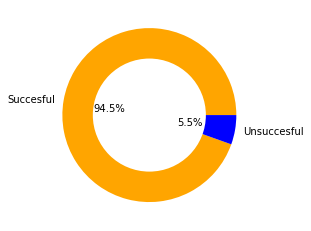

In [29]:
#percentage of attacks that were succesful
succes = with_casualties['success'].value_counts().reset_index()
plt.figure()
plt.pie(succes['success'], labels = ['Succesful', 'Unsuccesful'], colors = ['orange', 'blue'], autopct = '%0.1f%%', pctdistance = 0.47)
circle = plt.Circle(xy = (0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

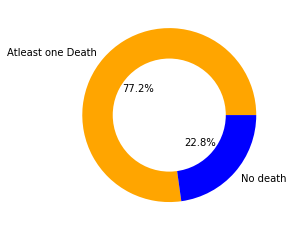

In [30]:
#percentage of attacks that had people killed.
killed = len([i for i in with_casualties['nkill'] if i>0])
not_killed = len([i for i in with_casualties['nkill'] if i<1])
dict = {'Index' : ['Killed', 'Not Killed'], 'Count' : [killed, not_killed]}
kil = pd.DataFrame(dict)
plt.figure()
plt.pie(kil['Count'], labels = ['Atleast one Death', 'No death'], colors = ['orange', 'blue'], autopct = '%0.1f%%', pctdistance = 0.47)
circle = plt.Circle(xy = (0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

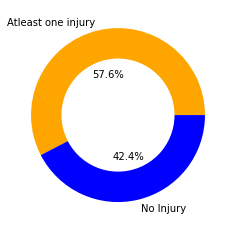

In [31]:
#percentage of attacks that had atleast one injury
injured = len([i for i in with_casualties['nwound'] if i>0])
not_injured = len([i for i in with_casualties['nwound'] if i<1])
dict = {'Index' : ['Injured', 'Not injured'], 'Count' : [injured, not_injured]}
kil = pd.DataFrame(dict)
plt.figure()
plt.pie(kil['Count'], labels = ['Atleast one injury', 'No Injury'], colors = ['orange', 'blue'], autopct = '%0.1f%%', pctdistance = 0.49)
circle = plt.Circle(xy = (0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

In [32]:
#create  a dataframe of weapons and how many times they have been used.
weapons = with_casualties['weaptype1_txt'].value_counts().reset_index()
lists = list(weapons['index'])
lists
weapons['index'] =['Explosives','Firearms','Unknown','Melee','Incendiary','Chemical','Vehicle','Other','Sabotage Equipment','Biological','Radiological','Fake Weapons']
weapons['percentage'] = (weapons['weaptype1_txt'])*100 /weapons['weaptype1_txt'].sum()
weapons

,index,weaptype1_txt,percentage
0,Explosives,48617,45.103023
1,Firearms,46516,43.153881
2,Unknown,7841,7.274262
3,Melee,3137,2.910262
4,Incendiary,1296,1.202327
5,Chemical,192,0.178122
6,Vehicle,107,0.099266
7,Other,54,0.050097
8,Sabotage Equipment,15,0.013916
9,Biological,14,0.012988


#### Weapons of choice bar chart

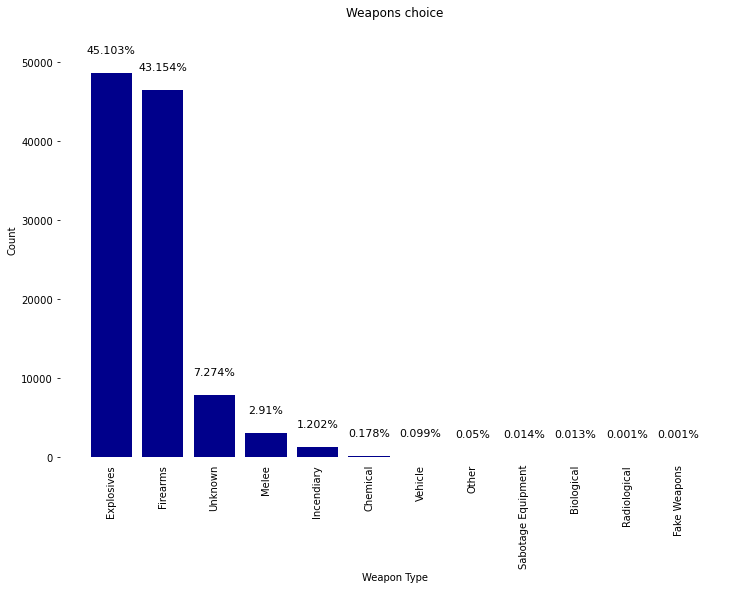

In [33]:
plt.figure(figsize = (12,8))
bars = plt.bar(weapons['index'],weapons['weaptype1_txt'], color = 'darkblue')
plt.xlabel('Weapon Type')
plt.ylabel('Count')
plt.title('Weapons choice')
plt.xticks(rotation = 90)
plt.ylim(0,55000)
plt.tick_params(top=False, bottom=False, left=True, right=False, labelleft=True, labelbottom=True)
for spine in plt.gca().spines.values():#we have to iterate thru all spines.values which are our four sides of the graph
    spine.set_visible(False)#and 
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2500, str(float(np.round(bar.get_height()*100/weapons['weaptype1_txt'].sum(),3))) + '%', 
                  ha = 'center', color = 'black', fontsize = 11)
plt.show()

#### Notorious Gangs

In [34]:
#create a dataframe of gangs and the number of attacks it has carried out.
gangs = with_casualties['gname'].value_counts().reset_index()
gangs.columns = ['gang name', 'Count']
gangs['percentage'] = gangs['Count']*100/gangs['Count'].sum()
gangs.head(15)

,gang name,Count,percentage
0,Unknown,50316,46.679222
1,Taliban,6165,5.719401
2,Islamic State of Iraq and the Levant (ISIL),4134,3.835200
3,Shining Path (SL),2179,2.021505
4,Al-Shabaab,2129,1.975119
5,Boko Haram,1922,1.783080
6,Irish Republican Army (IRA),1696,1.573415
7,New People's Army (NPA),1668,1.547439
8,Kurdistan Workers' Party (PKK),1575,1.461161
9,Revolutionary Armed Forces of Colombia (FARC),1406,1.304376


### Top 20 gangs

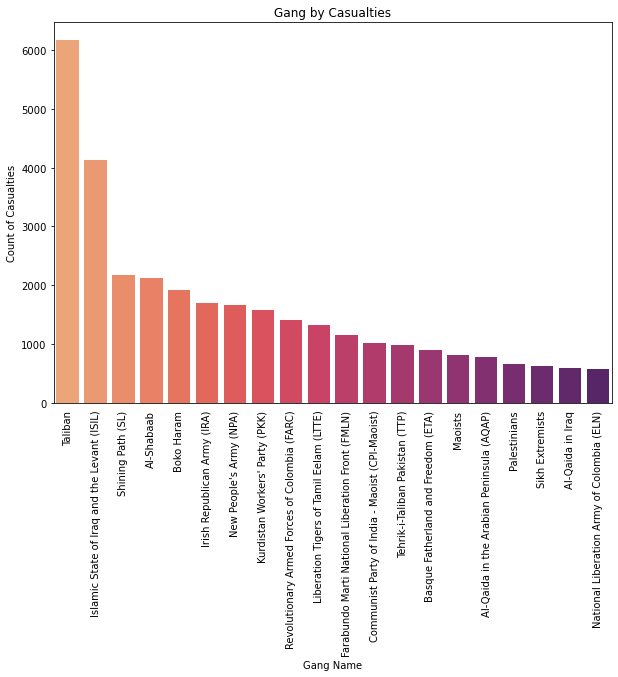

In [35]:
#creating a visual of the top 20 gangs
plt.figure(figsize = (10, 7))
sns.barplot(x = gangs['gang name'][1:21], y = gangs['Count'], palette = 'flare', saturation = 1)
plt.xticks(rotation = 90)
plt.title('Gang by Casualties')
plt.xlabel('Gang Name')
plt.ylabel('Count of Casualties')

plt.tick_params(top=False, bottom=False, left=True, right=False, labelleft=True, labelbottom = True)


plt.show()

### Grouping number of attacks by region and visualizing the data

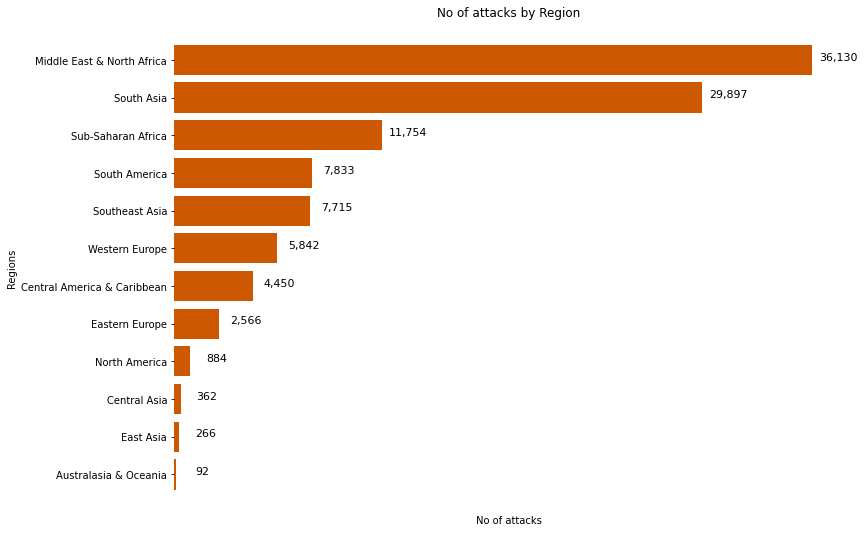

In [36]:
from matplotlib import cm

copied = with_casualties.copy()
copied['count of attacks'] = [1 for i in copied['gname']]#create a new column with all entries as 1 so that we can sum up attacks

gang_region = copied.groupby('region_txt').agg({'count of attacks' : np.sum}).reset_index() #group by gang region and sum attacks
gang_region.sort_values('count of attacks', ascending = True, inplace = True)# sort values in descending order


plt.figure(figsize = (12,9))
bars = plt.barh(gang_region['region_txt'], gang_region['count of attacks'], color = '#cc5801' )
plt.xticks(ticks = None, labels = None)
#plt.ylim(0,40000)
plt.xlabel('No of attacks')
plt.ylabel('Regions')
plt.title('No of attacks by Region')

plt.tick_params(top=False, bottom=False, left=True, right=False, labelleft=True, labelbottom=False)
for spine in plt.gca().spines.values():#we have to iterate thru all spines.values which are our four sides of the graph
    spine.set_visible(False)#and 

for bar in bars:
    plt.gca().text(bar.get_width() + 1500, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width()):,}', 
                   ha='center', color='black', fontsize=11)


plt.show()

### gangs in every region

In [37]:
groups = with_casualties.groupby(['region_txt', 'gname']).agg({'Casualties' : np.sum})
groups.sort_values(['region_txt','Casualties'], ascending = False, inplace = True)
groups.reset_index(inplace = True)
groups

,region_txt,gname,Casualties
0,Western Europe,Irish Republican Army (IRA),5458.0
1,Western Europe,Basque Fatherland and Freedom (ETA),3163.0
2,Western Europe,Unknown,2938.0
3,Western Europe,Al-Qaida,2832.0
4,Western Europe,Islamic State of Iraq and the Levant (ISIL),1034.0
...,...,...,...
2546,Australasia & Oceania,Greek Bulgarian Armenian Front,2.0
2547,Australasia & Oceania,Guadalcanal Liberation Army,2.0
2548,Australasia & Oceania,Justice Commandos for the Armenian Genocide,2.0
2549,Australasia & Oceania,Kanakas,2.0


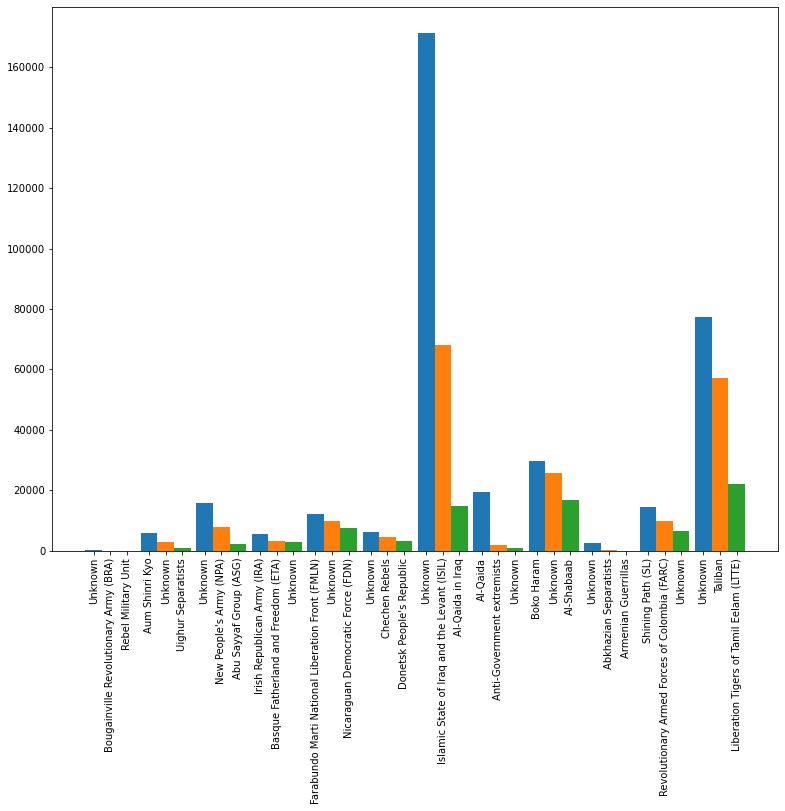

In [38]:
australasia = groups.where(groups['region_txt'] == 'Australasia & Oceania').dropna()
east_asia = groups.where(groups['region_txt'] == 'East Asia').dropna()[:3]
southeast_asia = groups.where(groups['region_txt'] == 'Southeast Asia').dropna()[:3]
Western_Europe = groups.where(groups['region_txt'] == 'Western Europe').dropna()[:3]
central_america = groups.where(groups['region_txt'] == 'Central America & Caribbean').dropna()[:3]
eastern_europe = groups.where(groups['region_txt'] == 'Eastern Europe').dropna()[:3]
middle_east = groups.where(groups['region_txt'] == 'Middle East & North Africa').dropna()[:3]
North_America = groups.where(groups['region_txt'] == 'North America').dropna()[:3]
SubSaharan = groups.where(groups['region_txt'] == 'Sub-Saharan Africa').dropna()[:3]
central_asia = groups.where(groups['region_txt'] == 'Central Asia').dropna()[:3]
south_america = groups.where(groups['region_txt'] == 'South America').dropna()[:3]
south_asia = groups.where(groups['region_txt'] == 'South Asia').dropna()[:3]

groupes = [australasia, east_asia, southeast_asia, Western_Europe, 
           central_america, eastern_europe, middle_east, North_America, 
           SubSaharan,central_asia, south_america, south_asia]
firsts = []
seconds = []
thirds = []
firsts_names = []
seconds_names = []
thirds_names = []

for i in groupes:
    firsts.append(list(i['Casualties'])[0])
    seconds.append(list(i['Casualties'])[1])
    thirds.append((list(i['Casualties'])[2]))

for i in groupes:
    firsts_names.append(list(i['gname'])[0])
    seconds_names.append(list(i['gname'])[1])
    thirds_names.append((list(i['gname'])[2]))
label = []
for i in range(len(firsts_names)):
    label.append(firsts_names[i])
    label.append(seconds_names[i])
    label.append(thirds_names[i])

plt.figure(figsize = (13,10))
plt.bar(list(np.arange(0, 12, 1)), firsts, width = 0.3, )
plt.bar(list(np.arange(0.3, 12.3, 1)), seconds, width = 0.3)
plt.bar(list(np.arange(0.6, 12.6, 1)), thirds, width = 0.3)
plt.xticks([0,0.3,0.6,1,1.3,1.6,2,2.3,2.6,3,3.3,3.6,4,4.3,4.6,5,
            5.3,5.6,6,6.3,6.6,7,7.3,7.6,8,8.3,8.6,9,9.3,9.6,10,
            10.3,10.6,11,11.3,11.6,], label, rotation = 90)
plt.show()

In [39]:
#group casualties by region to view the most affected regions
casualties_grouped = with_casualties.groupby('region_txt').agg({'Casualties' : np.sum})
casualties_grouped.reset_index(inplace = True)
casualties_grouped.sort_values('Casualties', ascending = False, inplace = True)
casualties_grouped

,region_txt,Casualties
5,Middle East & North Africa,351950.0
8,South Asia,242679.0
10,Sub-Saharan Africa,131243.0
7,South America,45553.0
9,Southeast Asia,41896.0
1,Central America & Caribbean,37699.0
6,North America,26447.0
11,Western Europe,25026.0
4,Eastern Europe,19460.0
3,East Asia,10365.0


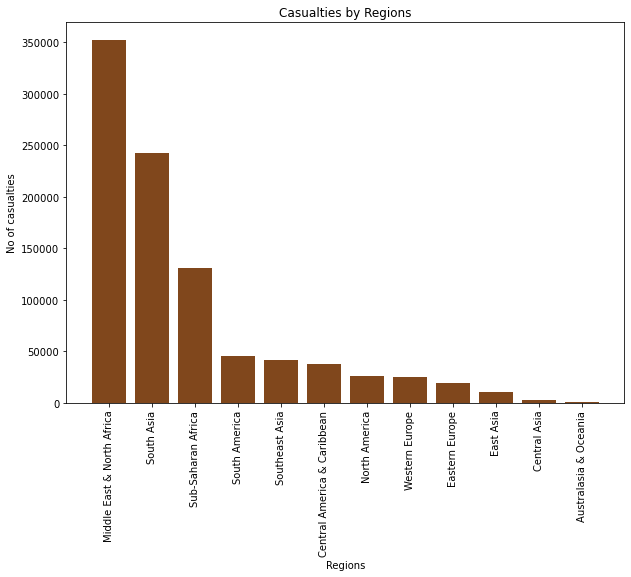

In [40]:
#visualizing the most affected regions
plt.figure(figsize = (10,7))
plt.bar(casualties_grouped['region_txt'], casualties_grouped['Casualties'], color = '#80471C', label = 'Casualties')
plt.xlabel('Regions')
plt.ylabel('No of casualties')
plt.title('Casualties by Regions')
plt.xticks(rotation = 90)
plt.show()

In [41]:
with_casualties['attacktype1_txt'].unique()

array(['Assassination', 'Unknown', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Bombing/Explosion',
       'Hostage Taking (Kidnapping)', 'Unarmed Assault', 'Hijacking',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [42]:
#group casualties by attacktype to view the attacktype with the most casualties
grouped_all = with_casualties.groupby('attacktype1_txt').agg({'nkill' : np.sum,
                                                              'nwound' : np.sum,
                                                              'Casualties' : np.sum})
grouped_all.reset_index(inplace = True)
grouped_all.sort_values('Casualties', ascending = True, inplace = True)
grouped_all

,attacktype1_txt,nkill,nwound,Casualties
3,Facility/Infrastructure Attack,3642.0,3765.0,7407.0
5,Hostage Taking (Barricade Incident),4478.0,3966.0,8444.0
7,Unarmed Assault,880.0,14027.0,14907.0
4,Hijacking,3718.0,17001.0,20719.0
6,Hostage Taking (Kidnapping),24231.0,6446.0,30677.0
1,Assassination,24920.0,13887.0,38807.0
8,Unknown,32381.0,14725.0,47106.0
0,Armed Assault,160297.0,77366.0,237663.0
2,Bombing/Explosion,157321.0,372686.0,530007.0


### Casualties Stacked Bar chart

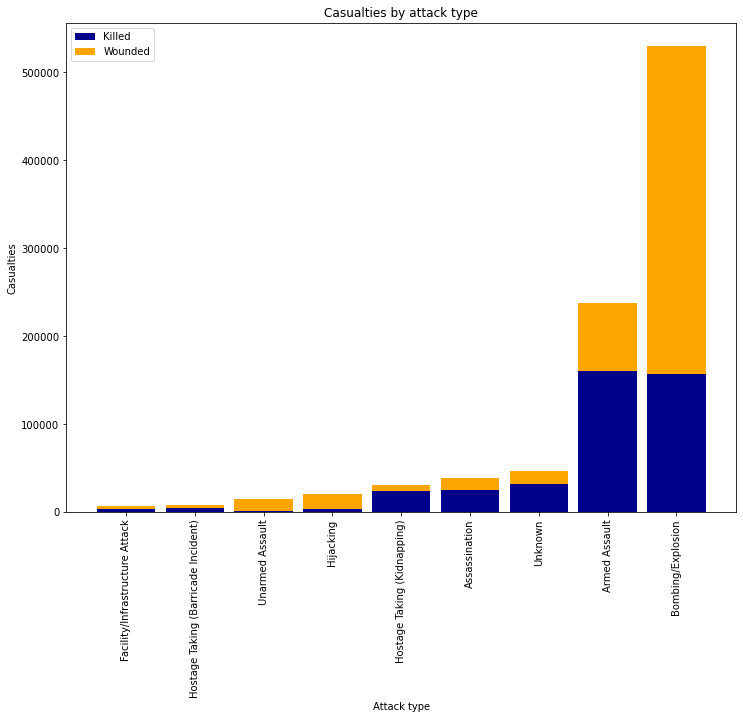

In [43]:
#create a stacked bar charts of attack type and casualties
plt.figure(figsize = (12, 9))
plt.bar(grouped_all['attacktype1_txt'], grouped_all['nkill'], label = 'Killed', color = 'darkblue', width = 0.85)
plt.bar(grouped_all['attacktype1_txt'], grouped_all['nwound'], bottom = grouped_all['nkill'], label = 'Wounded', 
        color = 'orange', width = 0.85)
plt.xlabel('Attack type')
plt.ylabel('Casualties')
plt.title('Casualties by attack type')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [44]:
#group casualties by country and visualize the most affected country
country = with_casualties.groupby('country_txt').agg({'nkill' : np.sum,
                                                      'nwound' : np.sum,
                                                      'Casualties' : np.sum})
country.reset_index(inplace = True)
country.sort_values('Casualties', ascending = False, inplace = True)
top_ten = country.head(10).copy()
top_ten.sort_values('Casualties', ascending = True, inplace = True)
top_ten

,country_txt,nkill,nwound,Casualties
135,Philippines,9559.0,13367.0,22926.0
183,United States,3771.0,20702.0,24473.0
33,Colombia,14698.0,10328.0,25026.0
169,Syria,15229.0,14109.0,29338.0
161,Sri Lanka,15530.0,15561.0,31091.0
125,Nigeria,22682.0,10239.0,32921.0
76,India,19341.0,28980.0,48321.0
129,Pakistan,23822.0,42038.0,65860.0
0,Afghanistan,39384.0,44277.0,83661.0
80,Iraq,78589.0,134690.0,213279.0


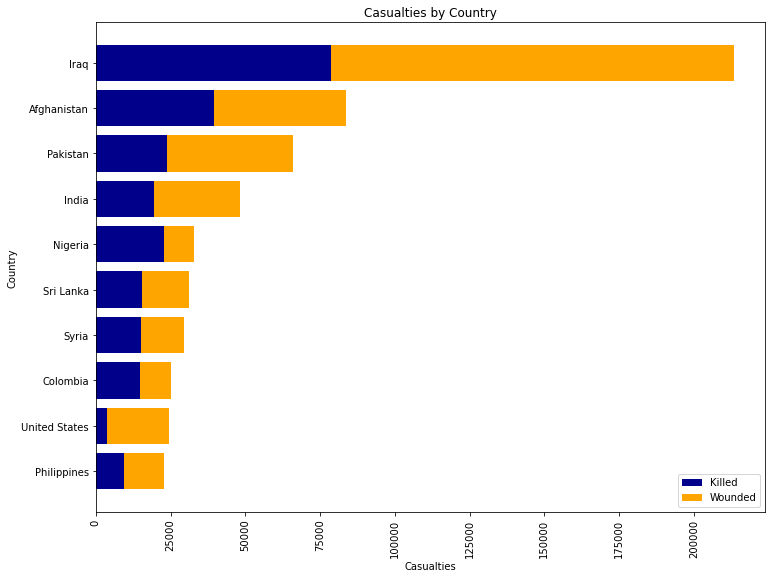

In [45]:
#create a horizontal stacked barchart of the most affected countries
plt.figure(figsize = (12, 9))
plt.barh(top_ten['country_txt'][:10], top_ten['nkill'][:10], label = 'Killed', color = 'darkblue')
plt.barh(top_ten['country_txt'][:10], top_ten['nwound'][:10], left = top_ten['nkill'][:10], label = 'Wounded', 
        color = 'orange')
plt.ylabel('Country')
plt.xlabel('Casualties')
plt.title('Casualties by Country')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

### TABLEAU VISUALIZATION
### Country 
- this image was visualized in Tableau 
- It shows a map with all the countries where deaths caused as a result of terrorism have been reported
![killedmap.png](killedmap.png)

- From the image, we notice that a lot of the reported deaths have happened in the **Middle East** in countries such as **Afghanistan**, **syria** and **Iraq**

#### Top 50 Countries with the most deaths
![top50death.png](top50death.png)
- the top 50 countries with the most deaths are mostly in the **Middle East**, **North Africa** and **Sub-saharan Africa**


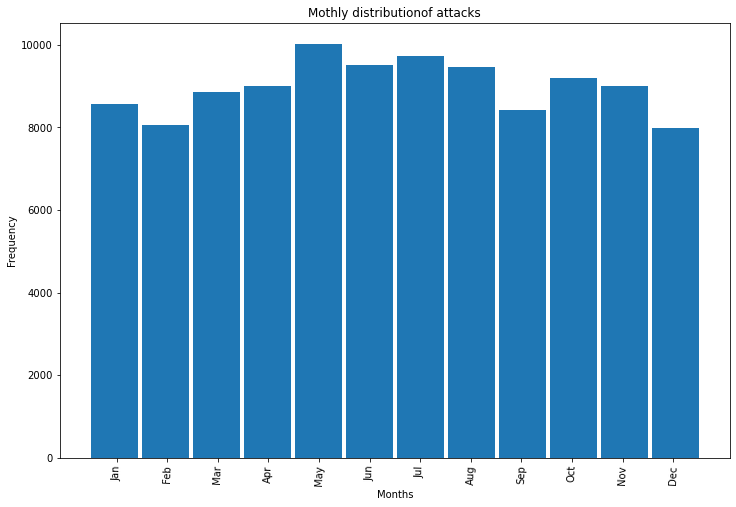

In [46]:
#create a histogram of attacks distribution throughout the months of the year
plt.figure(figsize = (12, 8))
plt.hist(with_casualties['imonth'], bins= 12, rwidth = 0.93)
plt.xticks(np.linspace(1.5,11.5,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 88)
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Mothly distributionof attacks')
plt.show()

In [47]:
with_casualties['region_txt'].value_counts()

Middle East & North Africa     36130
South Asia                     29897
Sub-Saharan Africa             11754
South America                   7833
Southeast Asia                  7715
Western Europe                  5842
Central America & Caribbean     4450
Eastern Europe                  2566
North America                    884
Central Asia                     362
East Asia                        266
Australasia & Oceania             92
Name: region_txt, dtype: int64

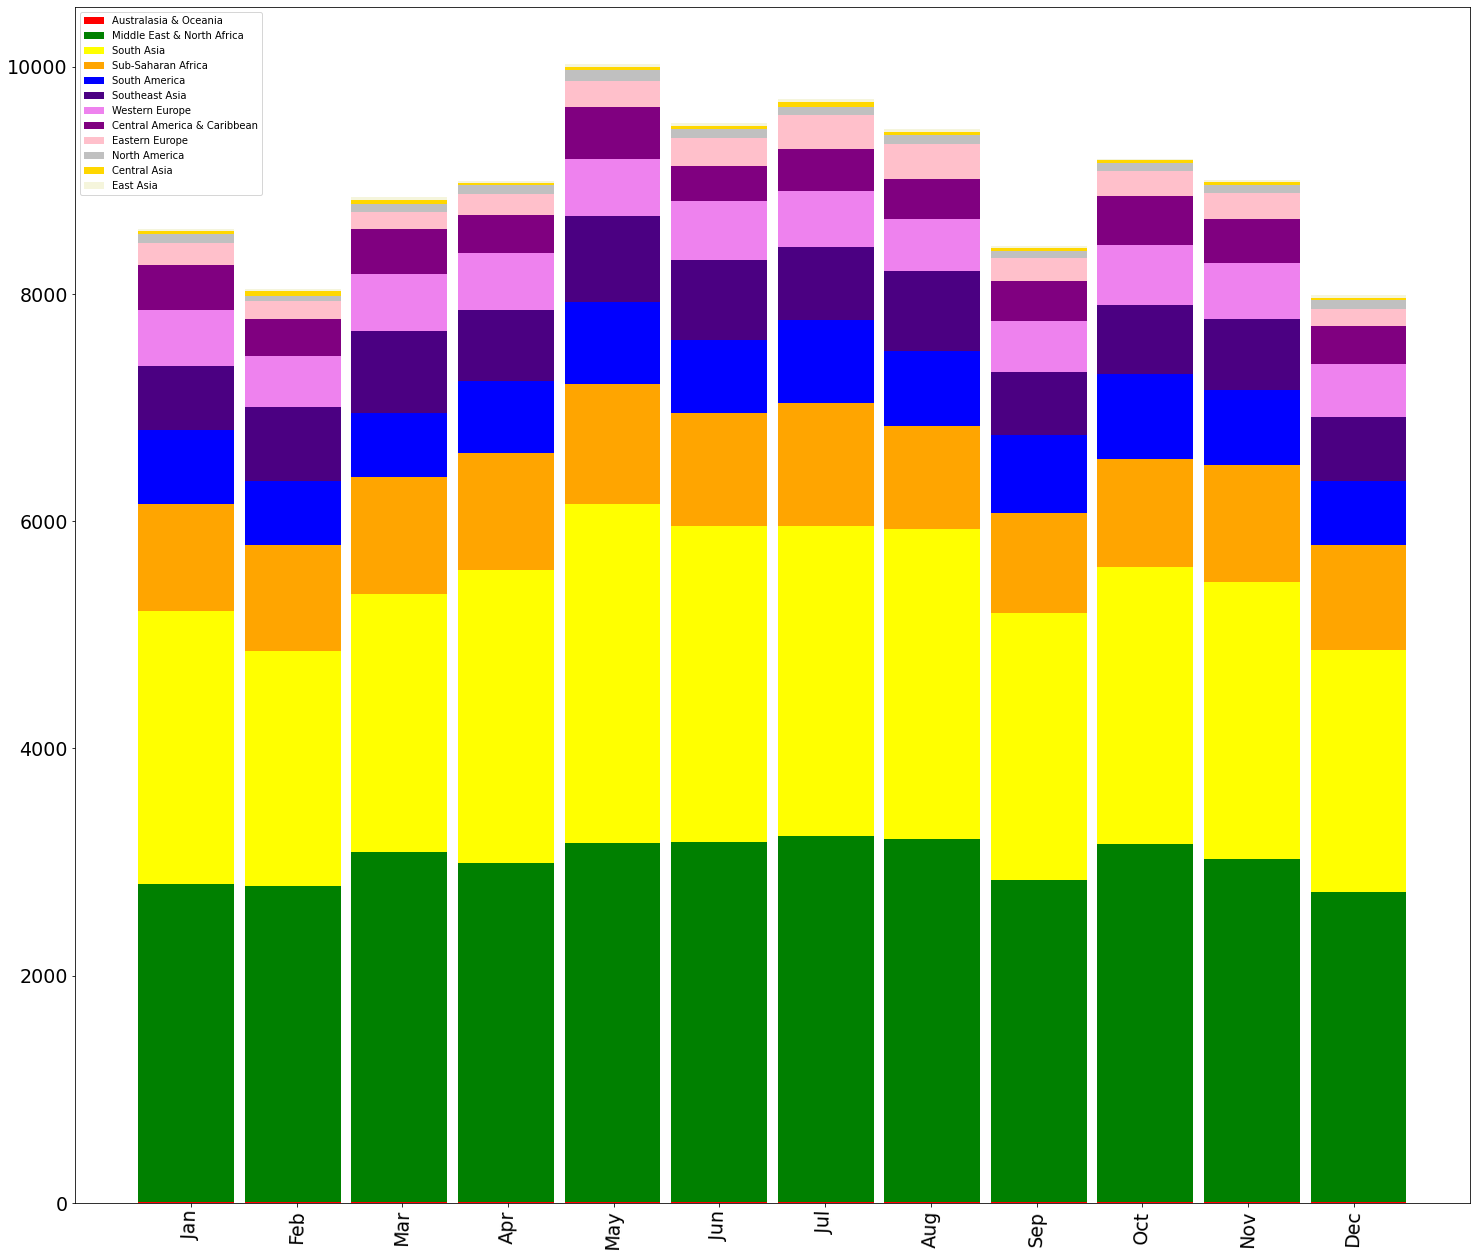

In [48]:
#creating a stacked histogram of the attacks distribution throughout the year.
australasia = with_casualties.where(with_casualties['region_txt'] == 'Australasia & Oceania').dropna(how = 'all')
middle_east = with_casualties.where(with_casualties['region_txt'] == 'Middle East & North Africa').dropna(how = 'all')
south_asia = with_casualties.where(with_casualties['region_txt'] == 'South Asia').dropna(how = 'all')
subsaharan = with_casualties.where(with_casualties['region_txt'] == 'Sub-Saharan Africa').dropna(how = 'all')
south_america = with_casualties.where(with_casualties['region_txt'] == 'South America').dropna(how = 'all')
southeast_asia = with_casualties.where(with_casualties['region_txt'] == 'Southeast Asia').dropna(how = 'all')
western_europe = with_casualties.where(with_casualties['region_txt'] == 'Western Europe').dropna(how = 'all')
central_america = with_casualties.where(with_casualties['region_txt'] == 'Central America & Caribbean').dropna(how = 'all')
eastern_europe = with_casualties.where(with_casualties['region_txt'] == 'Eastern Europe').dropna(how = 'all')
north_america = with_casualties.where(with_casualties['region_txt'] == 'North America').dropna(how = 'all')
central_asia = with_casualties.where(with_casualties['region_txt'] == 'Central Asia').dropna(how = 'all')
east_asia = with_casualties.where(with_casualties['region_txt'] == 'East Asia').dropna(how = 'all')


plt.figure(figsize = (25,22))
plt.hist([australasia['imonth'], middle_east['imonth'], south_asia['imonth'],
          subsaharan['imonth'], south_america['imonth'], southeast_asia['imonth'],
          western_europe['imonth'], central_america['imonth'], eastern_europe['imonth'],
          north_america['imonth'], central_asia['imonth'], east_asia['imonth']], 
          bins = 12 , stacked=True, density=False, rwidth = 0.9, 
          label = ['Australasia & Oceania', 'Middle East & North Africa', 'South Asia', 
                   'Sub-Saharan Africa', 'South America', 'Southeast Asia',
                   'Western Europe', 'Central America & Caribbean', 'Eastern Europe',
                   'North America', 'Central Asia', 'East Asia'],
         color = ['red', 'green', 'yellow', 'orange', 'blue', 'indigo',
                  'violet', 'purple', 'pink', 'silver', 'gold', 'beige'])
plt.xticks(np.linspace(1.5,11.5,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 88, fontsize = 19)
plt.yticks(fontsize = 19)
plt.legend()
plt.show()


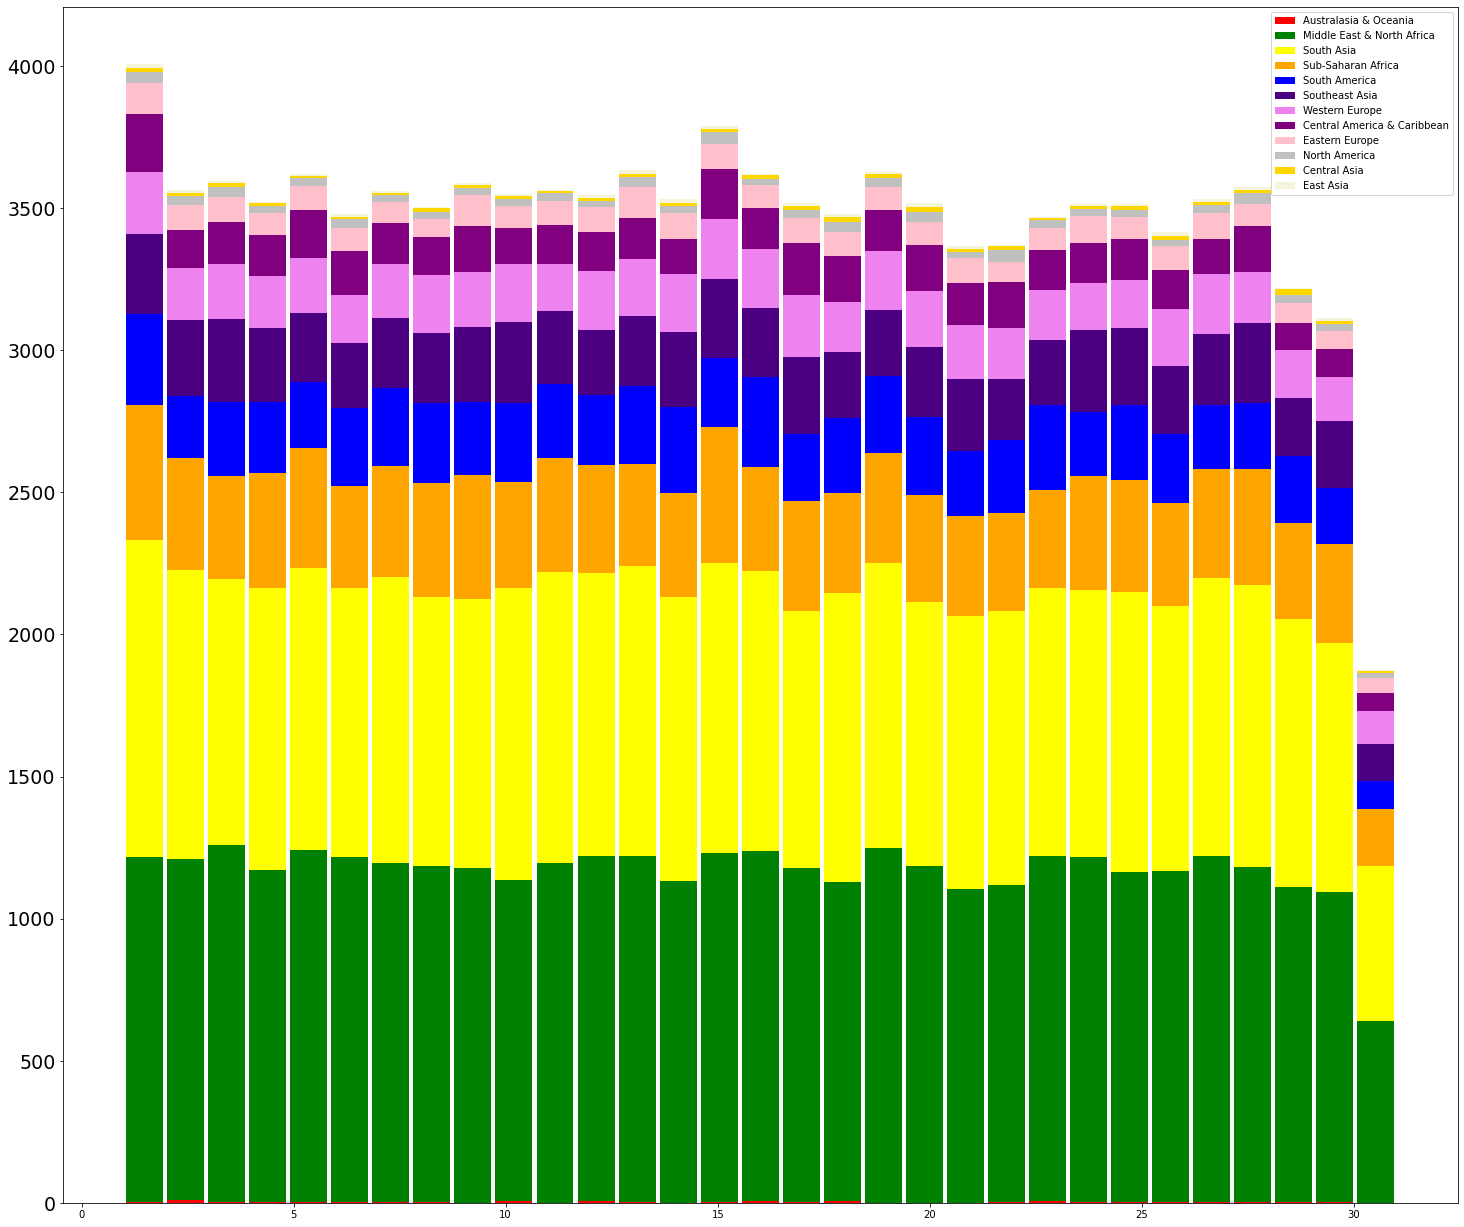

In [49]:
plt.figure(figsize = (25,22))
plt.hist([australasia['iday'], middle_east['iday'], south_asia['iday'],
          subsaharan['iday'], south_america['iday'], southeast_asia['iday'],
          western_europe['iday'], central_america['iday'], eastern_europe['iday'],
          north_america['iday'], central_asia['iday'], east_asia['iday']], 
          bins = 31 , stacked=True, density=False, rwidth = 0.9, 
          label = ['Australasia & Oceania', 'Middle East & North Africa', 'South Asia', 
                   'Sub-Saharan Africa', 'South America', 'Southeast Asia',
                   'Western Europe', 'Central America & Caribbean', 'Eastern Europe',
                   'North America', 'Central Asia', 'East Asia'],
         color = ['red', 'green', 'yellow', 'orange', 'blue', 'indigo',
                  'violet', 'purple', 'pink', 'silver', 'gold', 'beige'])
#plt.xticks(np.linspace(1.5,32.5,31), np.arange(1,31,1), rotation = 88, fontsize = 19)
plt.yticks(fontsize = 19)
plt.legend()
plt.show()


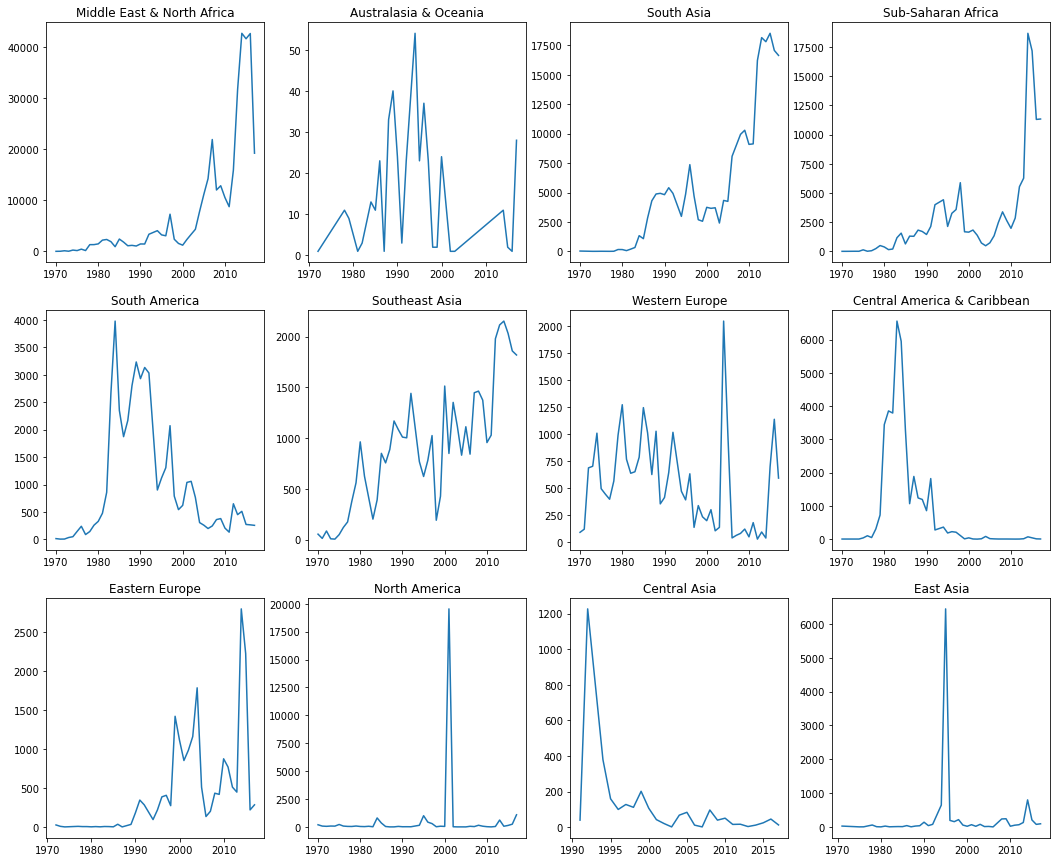

In [50]:
#creating a time series plit of every 
aust_grouped = australasia.groupby('iyear').agg({'Casualties' : np.sum}).reset_index()
middle_grouped = middle_east.groupby('iyear').agg({'Casualties' : np.sum}).reset_index()
south_grouped = south_asia.groupby('iyear').agg({'Casualties' : np.sum}).reset_index()
sub_grouped = subsaharan.groupby('iyear').agg({'Casualties' : np.sum}).reset_index()
southamerica_grouped = south_america.groupby('iyear').agg({'Casualties' : np.sum}).reset_index()
southasia_grouped = southeast_asia.groupby('iyear').agg({'Casualties' : np.sum}).reset_index()
westeurope_grouped = western_europe.groupby('iyear').agg({'Casualties' : np.sum}).reset_index()
centralamerica_grouped = central_america.groupby('iyear').agg({'Casualties' : np.sum}).reset_index()
easteuro_grouped = eastern_europe.groupby('iyear').agg({'Casualties' : np.sum}).reset_index()
northamerica_grouped = north_america.groupby('iyear').agg({'Casualties' : np.sum}).reset_index()
centralasia_grouped = central_asia.groupby('iyear').agg({'Casualties' : np.sum}).reset_index()
eastasia_grouped = east_asia.groupby('iyear').agg({'Casualties' : np.sum}).reset_index()
middle_grouped

plt.figure(figsize = (18, 15))

plt.subplot(3,4,1,)
plt.plot(middle_grouped['iyear'], middle_grouped['Casualties'])
plt.title('Middle East & North Africa')

plt.subplot(3,4,2,)#
plt.plot(aust_grouped['iyear'],aust_grouped['Casualties'])
plt.title('Australasia & Oceania')

plt.subplot(3,4,3)# 
plt.plot(south_grouped['iyear'], south_grouped['Casualties'])
plt.title('South Asia')

plt.subplot(3,4,4)# 
plt.plot(sub_grouped['iyear'], sub_grouped['Casualties'])
plt.title('Sub-Saharan Africa')

plt.subplot(3,4,5)#, 
plt.plot(southamerica_grouped['iyear'], southamerica_grouped['Casualties'])
plt.title('South America')

plt.subplot(3,4,6)#
plt.plot(southasia_grouped['iyear'], southasia_grouped['Casualties'])
plt.title('Southeast Asia')

plt.subplot(3,4,7)# 
plt.plot(westeurope_grouped['iyear'],westeurope_grouped['Casualties'])
plt.title('Western Europe')

plt.subplot(3,4,8)# 
plt.plot(centralamerica_grouped['iyear'],centralamerica_grouped['Casualties'])
plt.title('Central America & Caribbean')

plt.subplot(3,4,9)# 
plt.plot(easteuro_grouped['iyear'],easteuro_grouped['Casualties'])
plt.title('Eastern Europe')

plt.subplot(3,4,10) 
plt.plot(northamerica_grouped['iyear'],northamerica_grouped['Casualties'])
plt.title('North America')

plt.subplot(3,4,11)# 
plt.plot(centralasia_grouped['iyear'], centralasia_grouped['Casualties'])
plt.title('Central Asia')

plt.subplot(3,4,12)# 
plt.plot(eastasia_grouped['iyear'],eastasia_grouped['Casualties'])
plt.title('East Asia')

plt.show()


## Data Modelling
### Time Series Analysis and Forecasting

HP Envy 13 - 55,000
elitebook 840 G3 i5 512gb ssd 8gb ram 45,000

In [51]:
casualties_ts = with_casualties.groupby(['iyear', 'imonth']).agg({'Casualties' : np.sum})
casualties_ts = casualties_ts.reset_index()
casualties_ts.columns = ['Year', 'Month', 'Casualties']
casualties_ts['Year'] = [int(i) for i in casualties_ts['Year']]
casualties_ts['Month'] = [int(i) for i in casualties_ts['Month']]
casualties_ts['Day'] = [1 for i in range(len(casualties_ts['Month']))]
casualties_ts['Casualties'] = [int(i) for i in casualties_ts['Casualties']]
casualties_ts[['Day', 'Month', 'Year', 'Casualties']]
casualties_ts['Date'] = casualties_ts.apply(lambda row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}-{int(row.Day)}", '%Y-%m-%d'), axis=1)
casualties_ts = casualties_ts[['Date', 'Casualties']]
casualties_ts

,Date,Casualties
0,1970-01-01,7
1,1970-02-01,80
2,1970-03-01,28
3,1970-04-01,57
4,1970-05-01,50
...,...,...
559,2017-08-01,4591
560,2017-09-01,3270
561,2017-10-01,5515
562,2017-11-01,3716


In [52]:
casualties_ts.set_index('Date',inplace = True)
casualties_ts.describe()

,Casualties
count,564.000000
mean,1659.108156
std,1959.116046
min,1.000000
25%,527.750000
50%,1072.500000
75%,1884.000000
max,20453.000000


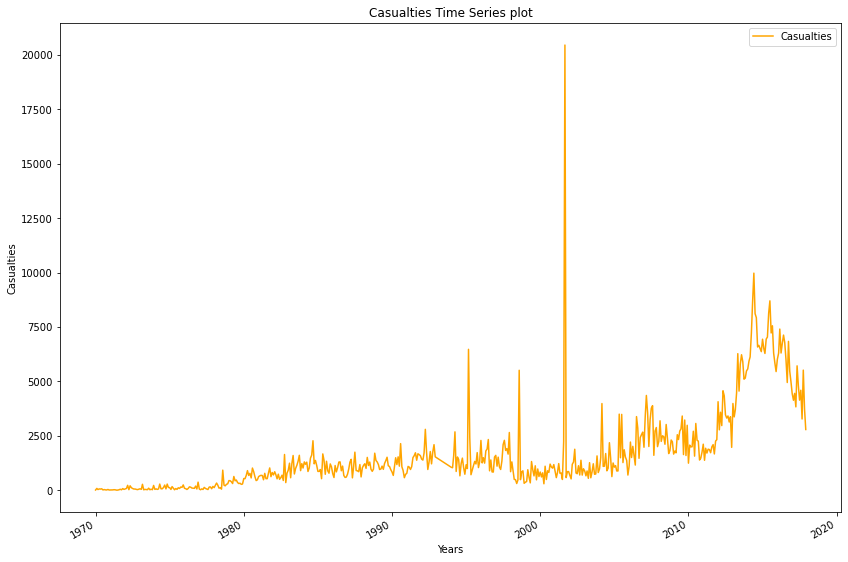

In [53]:
#plot our time series Casualties data
casualties_ts.plot(figsize = (14,10), label = 'Terorism Casualties', color = 'orange')
plt.xlabel('Years')
plt.ylabel('Casualties')
plt.title('Casualties Time Series plot')
plt.legend()
plt.show()

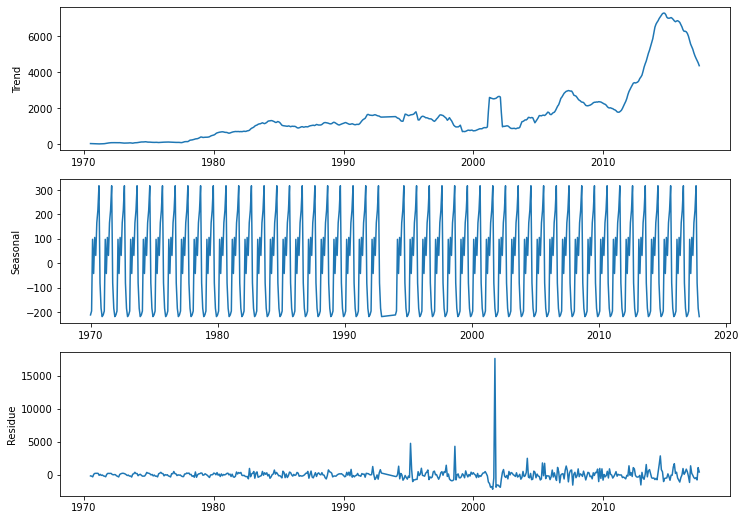

In [54]:
#we deompose our data to view the trend,seasonality and the residue  
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(casualties_ts, model = 'additive', period = 12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residue = decomposition.resid

plt.figure(figsize = (12,9))
plt.subplot(311,)
plt.plot(trend, label = 'trend')
plt.ylabel('Trend')

plt.subplot(312)
plt.plot(seasonal, label = 'seasonal')
plt.ylabel('Seasonal')

plt.subplot(313)
plt.plot(residue, label = 'residual')
plt.ylabel('Residue')
plt.show()

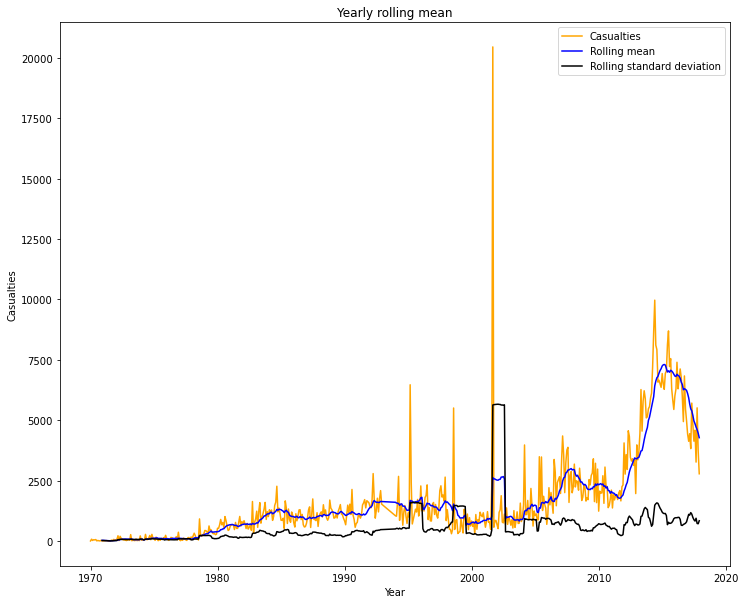

In [55]:
#since our time series plot is not stationary, we try to make it stationary by calculating the yearly rolling mean
#this will eliminate the first 11 points in our data set
roll_mean = casualties_ts.rolling(window = 12).mean()
roll_std = casualties_ts.rolling(window = 12).std()

plt.figure(figsize = (12,10))
ts = plt.plot(casualties_ts, color = 'orange', label = 'Casualties')
mean = plt.plot(roll_mean, color = 'blue', label = 'Rolling mean')
std = plt.plot(roll_std, color = 'black', label = 'Rolling standard deviation')
plt.legend()
plt.title('Yearly rolling mean')
plt.xlabel('Year')
plt.ylabel('Casualties')
plt.show(block = False)

### Anomaly Detection
### Dealing with outliers

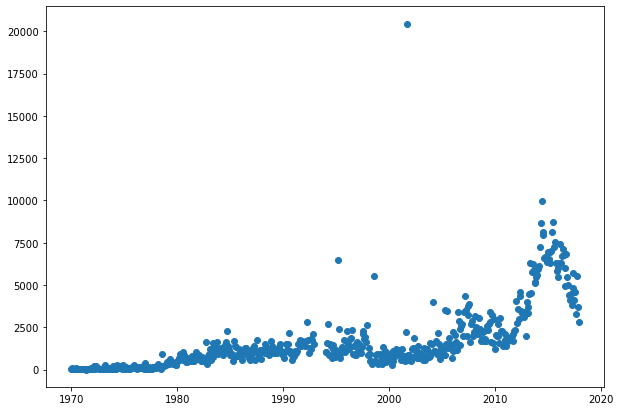

In [56]:
#plotting a scatter plot.
plt.figure(figsize = (10, 7))
plt.scatter(casualties_ts.index, casualties_ts['Casualties'])
plt.show()

- from the scatter plot it now becomes easier to spot the outlier
- Outliers have to be detected and treated, 
- the presence of outliers in ts data affects the perfomance of Time series models

In [57]:
#treating the outlier
#treating of outliers is subjective, in this case we will use the mean of the specifc year to replace the outlier
outlier = max(casualties_ts['Casualties'])
outlier

20453

In [58]:
#creating a dataframe wit values from 2001
casualties_2001 = casualties_ts.loc['2001-01-01':'2001-12-01']
#drop the maximum value of 20453 from the dataframe
casualties_without_911 = casualties_2001.drop(pd.Timestamp('2001-09-01'))
#get the mean of the remainig 11 months
mean = casualties_without_911.mean().round(0)

#replacing the outlier value with the mean of the 11 months
casualties_treated = casualties_ts.replace(to_replace = outlier, value = mean)
#get a description of the data without outliers
casualties_treated.describe()

,Casualties
count,564.000000
mean,1624.464539
std,1791.800102
min,1.000000
25%,527.750000
50%,1069.000000
75%,1880.500000
max,9972.000000


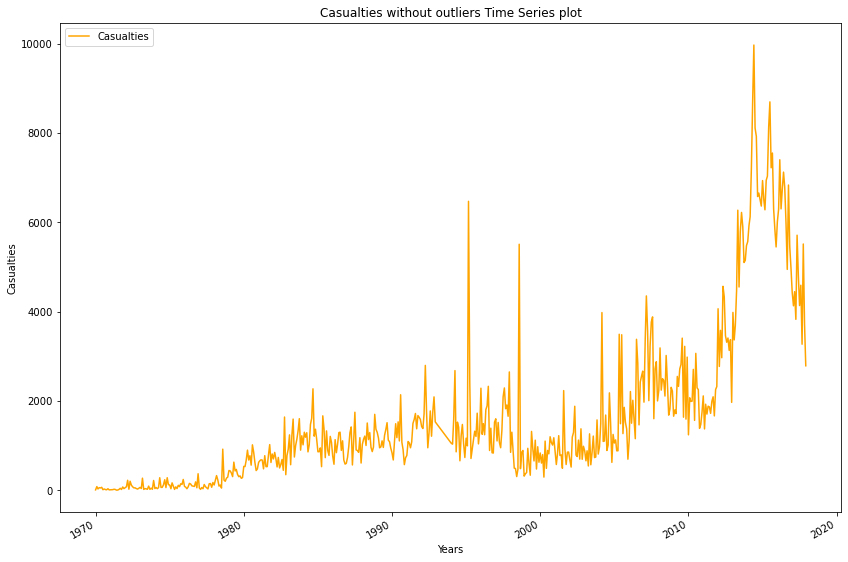

In [59]:
#plot our time series Casualties data
casualties_treated.plot(figsize = (14,10), label = 'Terorism Casualties', color = 'orange')
plt.xlabel('Years')
plt.ylabel('Casualties')
plt.title('Casualties without outliers Time Series plot')
plt.legend()
plt.show()

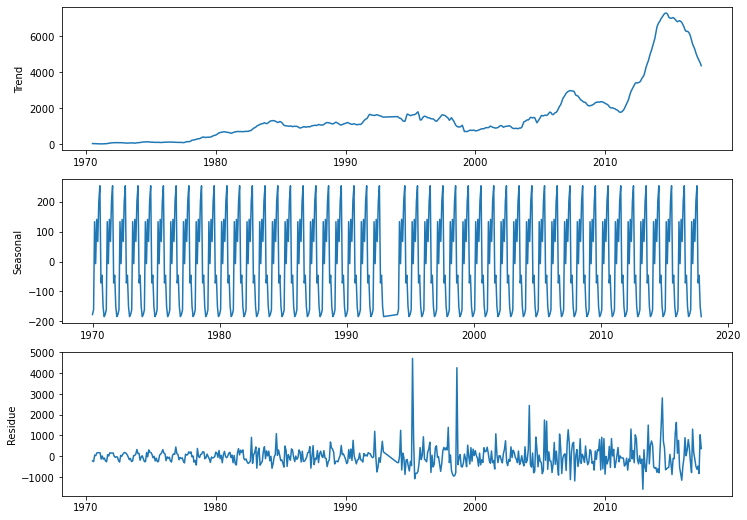

In [60]:
#we deompose our data to view the trend,seasonality and the residue  
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(casualties_treated, model = 'additive', period = 12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residue = decomposition.resid

plt.figure(figsize = (12,9))
plt.subplot(311,)
plt.plot(trend, label = 'trend')
plt.ylabel('Trend')

plt.subplot(312)
plt.plot(seasonal, label = 'seasonal')
plt.ylabel('Seasonal')

plt.subplot(313)
plt.plot(residue, label = 'residual')
plt.ylabel('Residue')
plt.show()

- from the decomposition plot, we notice that the data has an  upward trend,
- our terrorism data also depicts a seasonality trend and an some randomness

- As the data has a a lot of seasonality and has a falling trend at the end of the plot
- we will use the last three years of the data to create a model and forecast the number of deaths in the following 2 years

In [61]:
casualties_2017 = casualties_treated[516:]
casualties = casualties_2017[:36]
casualties

,Casualties
Date,
2014-01-01,5569
2014-02-01,5932
2014-03-01,6123
2014-04-01,7220
2014-05-01,8655
2014-06-01,9972
2014-07-01,8112
2014-08-01,7927
2014-09-01,6579


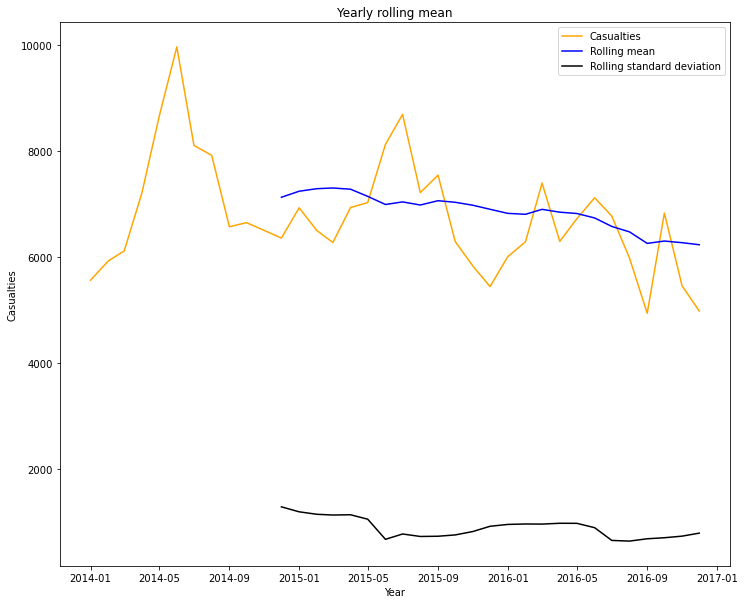

In [62]:
#since our time series plot is not stationary, we try to make it stationary by calculating the yearly rolling mean
#this will eliminate the first 11 points in our data set
roll_mean = casualties.rolling(window = 12).mean()
roll_std = casualties.rolling(window = 12).std()

plt.figure(figsize = (12,10))
ts = plt.plot(casualties, color = 'orange', label = 'Casualties')
mean = plt.plot(roll_mean, color = 'blue', label = 'Rolling mean')
std = plt.plot(roll_std, color = 'black', label = 'Rolling standard deviation')
plt.legend()
plt.title('Yearly rolling mean')
plt.xlabel('Year')
plt.ylabel('Casualties')
plt.show(block = False)

- after checking the yearly rolling mean and plotting the values, 
- We notice that the model still shows a downward trend and this means that the data is still not stationary
- The rolling standard deviation is also non-statioary 
- we will need to differentiate our data values till it is stationary to perform time series modelling


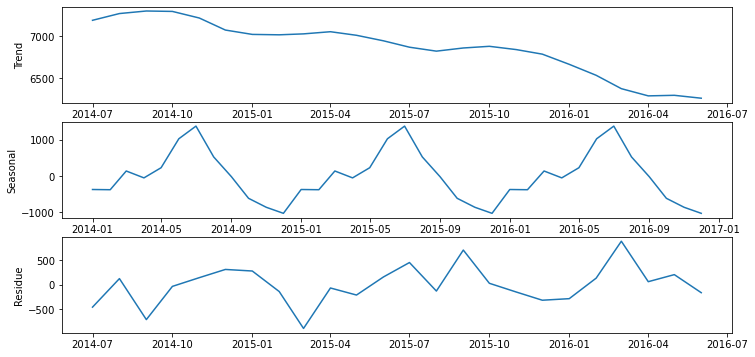

In [63]:
#we deompose our data to view the trend,seasonality and the residue  
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(casualties, model = 'additive', period = 12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residue = decomposition.resid

plt.figure(figsize = (12,6))
plt.subplot(311,)
plt.plot(trend, label = 'trend')
plt.ylabel('Trend')

plt.subplot(312)
plt.plot(seasonal, label = 'seasonal')
plt.ylabel('Seasonal')

plt.subplot(313)
plt.plot(residue, label = 'residual')
plt.ylabel('Residue')
plt.show()

### ARIMA(pdq) Modelling
- ARIMA means **Autoregressive Integrated Moving Average**
- Arima models are defined for stationary time series. 
- Therefore we have to differentiate our non-stationary time series untill we obtain a stationary time series

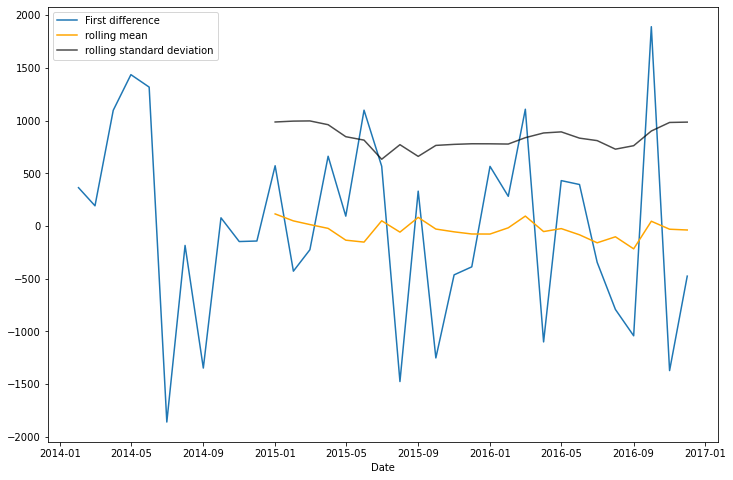

In [64]:
#differentiating casualties time series data
first_diff = casualties.diff()
second_diff =  casualties.diff()
diff_mean = first_diff.rolling(window = 12).mean()
diff_std = first_diff.rolling(window = 12).std()

plt.figure(figsize = (12, 8))
plt.plot(first_diff, label = 'First difference')
plt.plot(diff_mean, color = 'orange', label = 'rolling mean')
plt.plot(diff_std, color = 'black', alpha = 0.7, label = 'rolling standard deviation')
plt.xlabel('Date')
plt.legend()
plt.show()

- after the first diferencing, our time series data appears stationary 
- the time series of the first difference appears to be stationary in mean and variance, as the level of the series is roughly constant over time
- Therefore the value of d in our ARIMA(p,d,q) model is 1
- we then proceed to plot autocorellation and partial autocorrelation graphs so as to determine the value of p and q

In [65]:
#Import models to plot autocolleration and partial autocorrelation graph.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

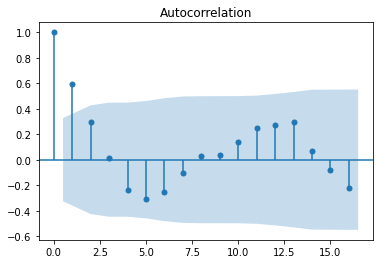

In [66]:
#plot acf plot to identify parameter q in ARIMA(p,d,q)
plot_acf(casualties)
plt.show()
#value of q = 2,3

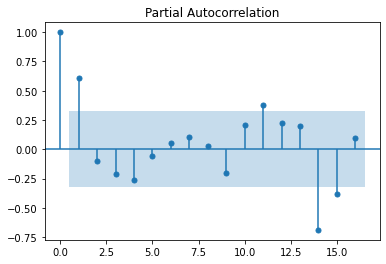

In [67]:
plot_pacf(casualties)
plt.show()
#value of p = 8

- after observing the autocolleration graph, we identify the value of q as 2
- subsequently the value of p = 3 after evaluation of the partial autocolleration graph
- The appropriate time series becomes ARIMA(3,1,2)

In [68]:
#Fit the time series model

import warnings
warnings.filterwarnings('ignore')



from statsmodels.tsa.arima_model import ARIMA
ts_model = ARIMA(casualties, order = (3,1,2)).fit()


### GET A STATISTICAL SUMMARY OF OUR FITTED MODEL

In [69]:
print(ts_model.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Casualties   No. Observations:                   35
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -280.236
Method:                       css-mle   S.D. of innovations            614.533
Date:                Thu, 05 May 2022   AIC                            574.472
Time:                        14:03:16   BIC                            585.359
Sample:                    02-01-2014   HQIC                           578.230
                         - 12-01-2016                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -42.6084      4.992     -8.535      0.000     -52.393     -32.824
ar.L1.D.Casualties     1.1676      0.174      6.704      0.000       0.826       1.509
ar.L2.D.Casualties  

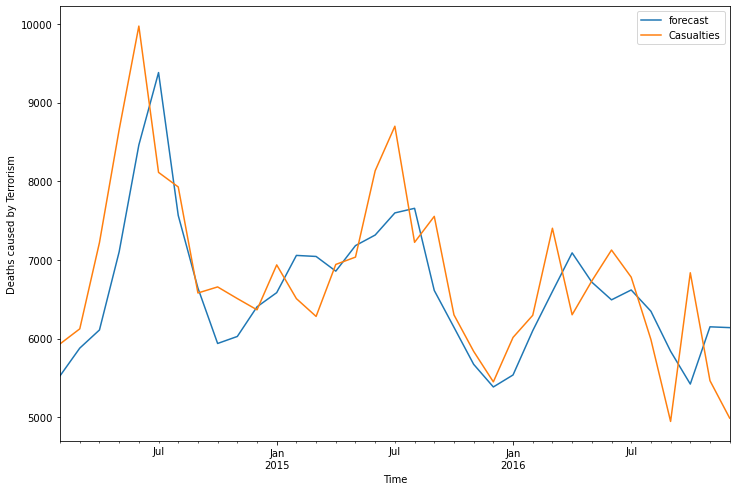

In [70]:
#fit our real value and the forecasted values to get a graphical representation of our model
fig = ts_model.plot_predict(dynamic=False,)
fig.set_size_inches(12,8)
plt.xlabel('Time')
plt.ylabel('Deaths caused by Terrorism')
plt.show()

In [71]:
#forecast the next 2 years 
ts_forecast = ts_model.forecast(steps = 24)
pd.DataFrame(ts_forecast)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,5845.61,6260.54,6614.95,6608.5,6340.55,5897.04,5443.76,5116.29,4994.74,5078.23,...,5665.22,5453.67,5205.54,4994.4,4871.86,4853.1,4916.6,5016.1,5099.33,5126.28
1,614.533,623.106,626.788,697.885,790.109,851.309,865.979,866.496,885.962,922.529,...,983.326,998.067,1004.21,1004.44,1006.43,1013.08,1020.5,1024.27,1024.65,1025.2
2,"[4641.150908504929, 7050.077400227508]","[5039.27863210702, 7481.810672546322]","[5386.466543616224, 7843.429631887878]","[5240.673275522635, 7976.331853733314]","[4791.967876837077, 7889.136314075241]","[4228.503435386287, 7565.572438676292]","[3746.470098024078, 7141.046671756867]","[3417.9846280444035, 6814.587885941841]","[3258.282848732114, 6731.190744915118]","[3270.1108953570956, 6886.35737252295]",...,"[3737.937840294719, 7592.504223234751]","[3497.4934056959473, 7409.8445410252725]","[3237.321232823673, 7173.752395036054]","[3025.7313151666654, 6963.073663993793]","[2899.283010360242, 6844.428571023246]","[2867.489952435366, 6838.703543676973]","[2916.4452049400184, 6916.7472966802125]","[3008.562264058646, 7023.63134430522]","[3091.0472175382547, 7107.603964094909]","[3116.926652337452, 7135.631573460098]"


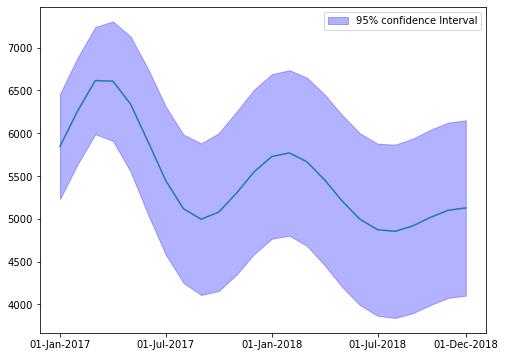

In [72]:
#plot the forecasted values 
plt.figure(figsize = (8,6))
plt.plot(np.arange(0,24,1), list(ts_forecast[0]))
plt.fill_between(x = np.arange(0,24,1), y1 =ts_forecast[0]- ts_forecast[1], y2 = ts_forecast[0] + ts_forecast[1], 
                 color = 'b', alpha = 0.3, label = '95% confidence Interval')
plt.xticks([ 0,  6, 12, 18, 23], ['01-Jan-2017', '01-Jul-2017', '01-Jan-2018', '01-Jul-2018', '01-Dec-2018'])
plt.legend()
plt.show()


In [73]:
np.arange(0,24,6)

array([ 0,  6, 12, 18])

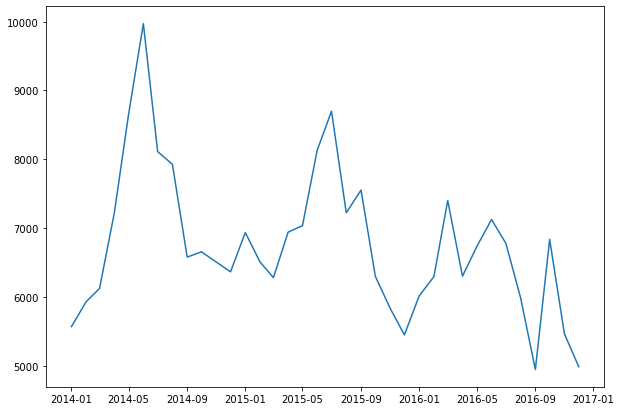

In [74]:
plt.figure(figsize = (10,7))
plt.plot(casualties)
plt.show()

In [75]:
predicted = list(ts_forecast[0])
predicted_round = [round(num) for num in predicted]
first = list(casualties['Casualties'])
first.extend(predicted_round)

### plotting the forecasted points

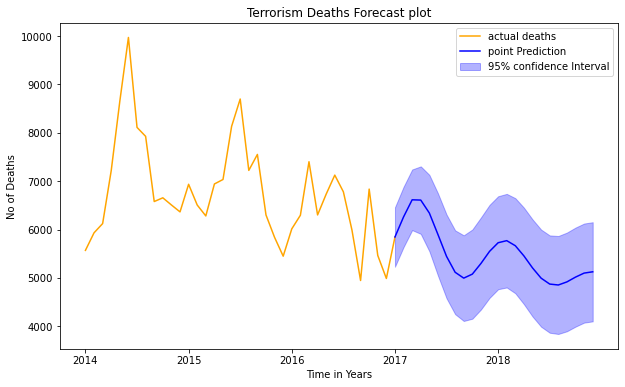

In [76]:
plt.figure(figsize = (10,6))
plt.plot(np.arange(0,37,1),first[:37], color = 'orange', label = 'actual deaths')
plt.plot(np.arange(36,60,1),first[36:], color = 'blue', label = 'point Prediction ')
plt.fill_between(x = np.arange(36,60,1), y1 =ts_forecast[0]- ts_forecast[1], y2 = ts_forecast[0] + ts_forecast[1], 
                 color = 'b', alpha = 0.3, label = '95% confidence Interval')
plt.xticks(np.arange(0,60,12),np.arange(2014,2019,1) )

plt.legend()
plt.title('Terrorism Deaths Forecast plot')
plt.xlabel('Time in Years')
plt.ylabel('No of Deaths')
plt.show()

- our time series model predicts that the number of deaths caused by terrorism will
- continue to reduce over the following two years, 2017 and 2018
- There model predicts there will still be a seasonal trend which tends to increase at the start of the year
- and reduces towards the third quater
- in the last quater of 2017 the number of deaths starts to increase all the way to the first quater of 2018